This notebook is continuation to the previous one where we contructed the whole dataset for the total contact rates for all the 152 countries. Here we will analyse the various values obtained with population and population density so as to extract a fine model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import preprocessing

Lets start Data analysis on the acquired data-set

In [3]:
data_df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP_data_notebook2.csv")
data_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(data_df.shape)
data_df.head()

(146, 9)


,Country,Population,Total_index,Home,Other,School,Work,Population_Density,Reproduction
0,Albania,2880913,3.838068e+07,1.068326e+07,1.430326e+07,5.625936e+06,7.768229e+06,105.00,0.95
1,Algeria,43053054,6.373596e+08,1.759553e+08,2.863821e+08,1.147987e+08,6.022355e+07,18.41,0.93
2,Antigua and Barbuda,97115,1.584368e+06,4.161274e+05,5.464844e+05,2.242885e+05,3.974679e+05,222.60,1.40
3,Argentina,44780675,6.731221e+08,2.020790e+08,2.373145e+08,9.613251e+07,1.375961e+08,16.52,0.94
4,Armenia,2957728,4.185080e+07,1.164423e+07,1.455815e+07,6.163886e+06,9.484537e+06,104.10,1.10


Lets do two kinds of model building - <br/>
• Including India and China <br/>
• Excluding India and China <br/>
The second analysis can give us better results for predicting contact baseline values for the cities in india. <br/>
First we will build models comprising of x = [population] and [population, population density] both

In [4]:
data_df['Pop_square'] = data_df['Population']**2

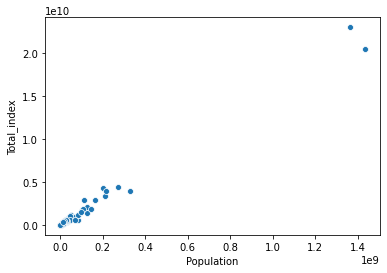

In [5]:
sns.scatterplot(x = 'Population', y = 'Total_index', data = data_df)

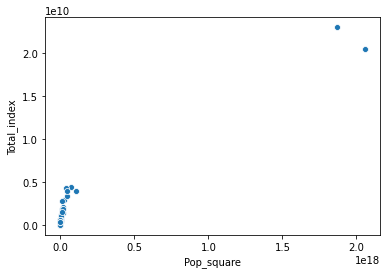

In [6]:
sns.scatterplot(x = 'Pop_square', y = 'Total_index', data = data_df)

Lets also examine that can the Total_index/population of the place correlate with the population density

In [7]:
data_df['Contact_by_population'] = data_df['Total_index']/data_df['Population']

In [8]:
data_df.head()

,Country,Population,Total_index,Home,Other,School,Work,Population_Density,Reproduction,Pop_square,Contact_by_population
0,Albania,2880913,3.838068e+07,1.068326e+07,1.430326e+07,5.625936e+06,7.768229e+06,105.00,0.95,8299659713569,13.322403
1,Algeria,43053054,6.373596e+08,1.759553e+08,2.863821e+08,1.147987e+08,6.022355e+07,18.41,0.93,1853565458726916,14.804050
2,Antigua and Barbuda,97115,1.584368e+06,4.161274e+05,5.464844e+05,2.242885e+05,3.974679e+05,222.60,1.40,9431323225,16.314350
3,Argentina,44780675,6.731221e+08,2.020790e+08,2.373145e+08,9.613251e+07,1.375961e+08,16.52,0.94,2005308853455625,15.031531
4,Armenia,2957728,4.185080e+07,1.164423e+07,1.455815e+07,6.163886e+06,9.484537e+06,104.10,1.10,8748154921984,14.149645


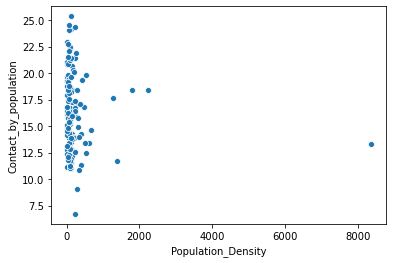

In [9]:
sns.scatterplot(x = 'Population_Density', y = 'Contact_by_population', data = data_df)

## Models -

In [10]:
X = data_df['Population'].values
y = data_df['Total_index'].values
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(116, 1)
(30, 1)


#### • Linear Regression

In [11]:
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9868366939654867
0.9585182691651426


In [12]:
pred = model.predict(X_train)
print(r2_score(y_train, pred))
# checking if score represents R2 score or not

0.9868366939654867


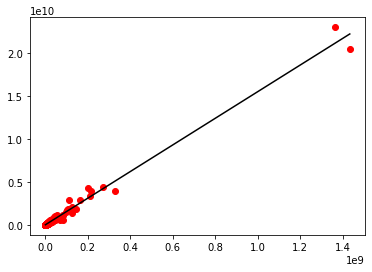

In [13]:
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'black')

The linear regression turn out quite accurate with the R2 score of about 95% on the test data

#### • Decision Tree Regression

In [14]:
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [15]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

0.9968510683835891
0.9163743552365647


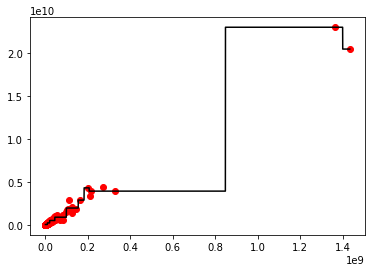

In [16]:
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, dtree.predict(X_grid), color = 'black')

The above technique will may be useful when the india and china datapoints are removed from the data-set.

#### • Regression (Population squared included)

In [77]:
model_1 = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())
model_1.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [18]:
print(model_1.score(X_train, y_train))
print(model_1.score(X_test, y_test))

0.9869567503496348
0.9586853794677547


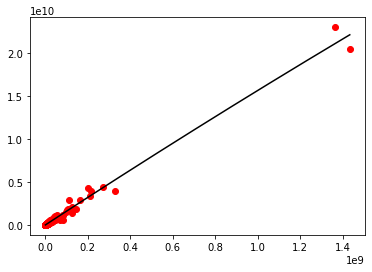

In [19]:
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model_1.predict(X_grid), color = 'black')

The above regression introduces another column of population squared and it gives a slightly better accuracy including both.

<b>Data-Set using both columns </b>

In [20]:
newX = data_df[['Population','Population_Density']].values
newy = data_df['Total_index'].values
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=0.20, random_state=40)
print(newX_train.shape); print(newX_test.shape)

(116, 2)
(30, 2)


In [21]:
dtree2 = DecisionTreeRegressor(max_depth=4)
dtree2.fit(newX_train, newy_train)
print(dtree2.score(newX_train, newy_train))
print(dtree2.score(newX_test, newy_test))

0.9972469920705024
0.9163743552365647


<b> Part 2 </b> <br/>
Lets start using the data without the inclusion of india and china which may be outliers to the dataset

In [22]:
data_df_copy = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP_data_notebook2.csv")
data_df_copy.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(data_df_copy.shape)
data_df_copy.head()

(146, 9)


,Country,Population,Total_index,Home,Other,School,Work,Population_Density,Reproduction
0,Albania,2880913,3.838068e+07,1.068326e+07,1.430326e+07,5.625936e+06,7.768229e+06,105.00,0.95
1,Algeria,43053054,6.373596e+08,1.759553e+08,2.863821e+08,1.147987e+08,6.022355e+07,18.41,0.93
2,Antigua and Barbuda,97115,1.584368e+06,4.161274e+05,5.464844e+05,2.242885e+05,3.974679e+05,222.60,1.40
3,Argentina,44780675,6.731221e+08,2.020790e+08,2.373145e+08,9.613251e+07,1.375961e+08,16.52,0.94
4,Armenia,2957728,4.185080e+07,1.164423e+07,1.455815e+07,6.163886e+06,9.484537e+06,104.10,1.10


In [23]:
data_df_copy.drop(data_df_copy.loc[data_df_copy['Country']=='India'].index, inplace=True)
data_df_copy.drop(data_df_copy.loc[data_df_copy['Country']=='China'].index, inplace=True)

In [24]:
print(data_df_copy.shape)

(144, 9)


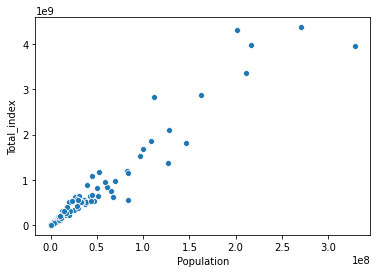

In [25]:
sns.scatterplot(x = 'Population', y = 'Total_index', data = data_df_copy)

In [26]:
X_cf = data_df_copy['Population'].values
y_cf = data_df_copy['Total_index'].values
X_cf = X_cf.reshape(-1,1)
#y = y.reshape(-1,1)
X_cf_train, X_cf_test, y_cf_train, y_cf_test = train_test_split(X_cf, y_cf, test_size=0.20, random_state=40)
print(X_cf_train.shape); print(X_cf_test.shape)

(115, 1)
(29, 1)


#### Models
• Linear Regression

In [27]:
model_clf = LinearRegression().fit(X_cf_train, y_cf_train)
print(model_clf.score(X_cf_train, y_cf_train))
print(model_clf.score(X_cf_test, y_cf_test))

0.9315222758886123
0.9549342887672504


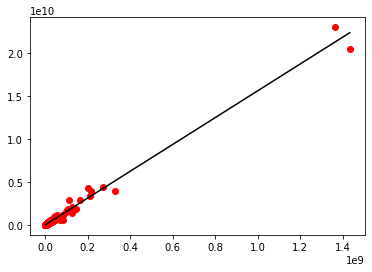

In [28]:
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model_clf.predict(X_grid), color = 'black')

In [29]:
print(model_clf.score(X_train,y_train))
print(model_clf.score(X_test,y_test))

0.9867897528206315
0.9585128045943732


• Polynomial Regression

In [30]:
model_1_cf = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())
model_1_cf.fit(X_cf_train, y_cf_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [31]:
print(model_1_cf.score(X_cf_train, y_cf_train))
print(model_1_cf.score(X_cf_test, y_cf_test))
print(model_1_cf.score(X_cf,y_cf))

0.9364456982053299
0.9092160685727744
0.9375306560642209


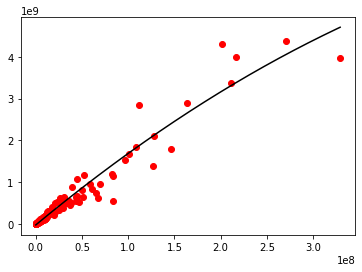

In [32]:
X_grid = np.arange(min(X_cf), max(X_cf), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_cf, y_cf, color = 'red')
plt.plot(X_grid, model_1_cf.predict(X_grid), color = 'black')

### Reproduction Number

In [33]:
newdata_df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP_data_notebook2.csv")
newdata_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(newdata_df.shape)
newdata_df.head()

(146, 9)


,Country,Population,Total_index,Home,Other,School,Work,Population_Density,Reproduction
0,Albania,2880913,3.838068e+07,1.068326e+07,1.430326e+07,5.625936e+06,7.768229e+06,105.00,0.95
1,Algeria,43053054,6.373596e+08,1.759553e+08,2.863821e+08,1.147987e+08,6.022355e+07,18.41,0.93
2,Antigua and Barbuda,97115,1.584368e+06,4.161274e+05,5.464844e+05,2.242885e+05,3.974679e+05,222.60,1.40
3,Argentina,44780675,6.731221e+08,2.020790e+08,2.373145e+08,9.613251e+07,1.375961e+08,16.52,0.94
4,Armenia,2957728,4.185080e+07,1.164423e+07,1.455815e+07,6.163886e+06,9.484537e+06,104.10,1.10


In [34]:
newdata_df['Contact_by_population'] = newdata_df['Total_index']/newdata_df['Population']

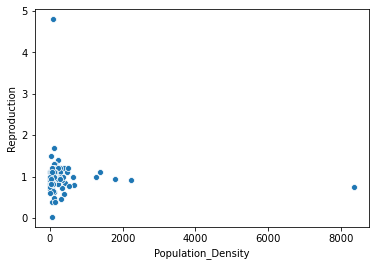

In [35]:
sns.scatterplot(x = 'Population_Density', y = 'Reproduction', data = newdata_df)

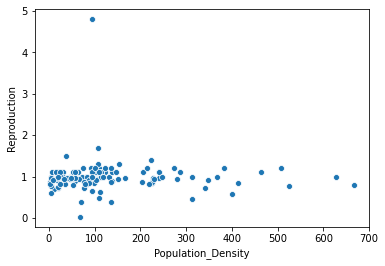

In [36]:
df_filtered = newdata_df[newdata_df['Population_Density'] <= 1000]
sns.scatterplot(x = 'Population_Density', y = 'Reproduction', data = df_filtered)

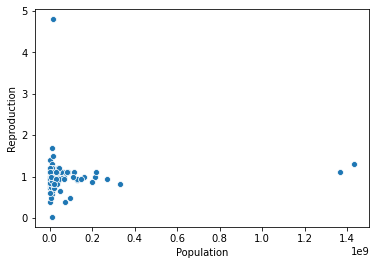

In [37]:
sns.scatterplot(x = 'Population', y = 'Reproduction', data = newdata_df)

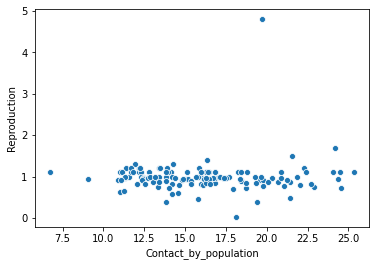

In [38]:
sns.scatterplot(x = 'Contact_by_population', y = 'Reproduction', data = newdata_df)

### Final Models

In [39]:
X = data_df['Population'].values
X = X.reshape(-1,1)
y1 = data_df['Total_index'].values
y2 = data_df['Home'].values
y3 = data_df['Work'].values
y4 = data_df['School'].values
y5 = data_df['Other'].values

In [40]:
model_1 = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())
model_1.fit(X, y1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [41]:
model_2 = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())
model_2.fit(X, y2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [42]:
model_3 = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())
model_3.fit(X, y3)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [43]:
model_4 = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())
model_4.fit(X, y4)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [44]:
model_5 = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())
model_5.fit(X, y5)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Text(0.5, 1.0, 'Other')

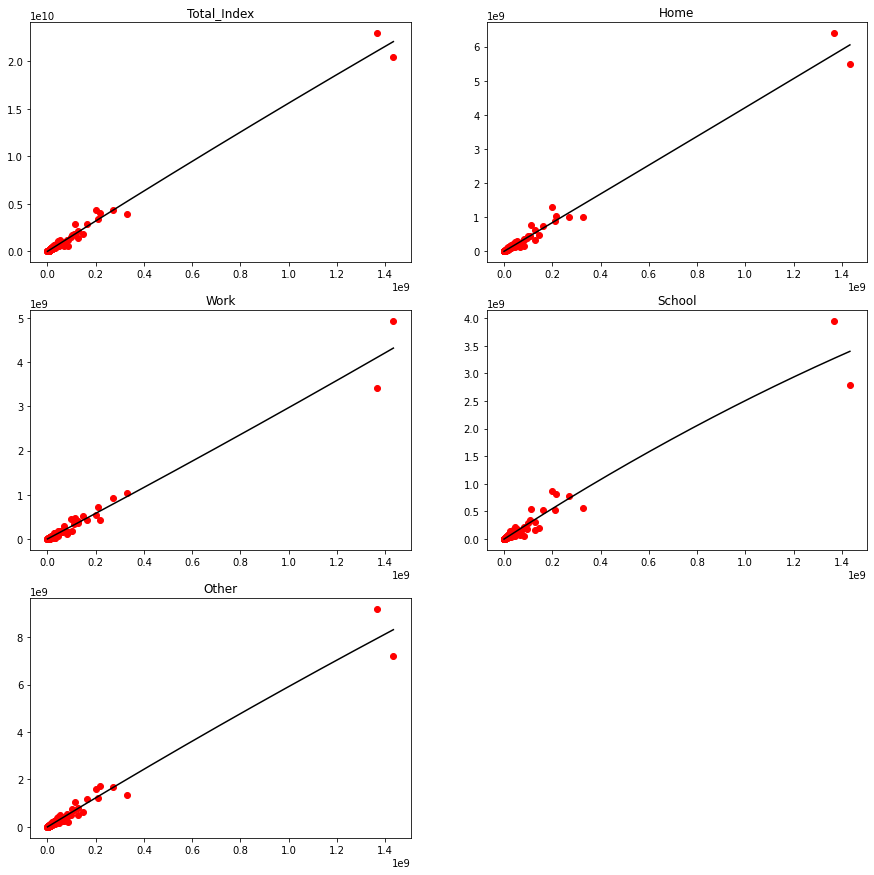

In [45]:
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y1, color = 'red')
plt.plot(X_grid, model_1.predict(X_grid), color = 'black')
plt.title('Total_Index')
plt.subplot(3,2,2)
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y2, color = 'red')
plt.plot(X_grid, model_2.predict(X_grid), color = 'black')
plt.title('Home')
plt.subplot(3,2,3)
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y3, color = 'red')
plt.plot(X_grid, model_3.predict(X_grid), color = 'black')
plt.title('Work')
plt.subplot(3,2,4)
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y4, color = 'red')
plt.plot(X_grid, model_4.predict(X_grid), color = 'black')
plt.title('School')
plt.subplot(3,2,5)
X_grid = np.arange(min(X), max(X), 1000) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y5, color = 'red')
plt.plot(X_grid, model_5.predict(X_grid), color = 'black')
plt.title('Other')

### Inference

• <b>Population Density</b> - <br/>
The problem with population density to estimate the number of contacts for the country level data is not a good estimate since the total Area includes large areas which are not habitable and they reduce the actual population density. We cannot make the claim that the entire population is evenly spread. The population density may play a role where we can assume that the population is evenly spread such as the smaller areas such as cities.

# Mobility Time Series

Lets try to first model the mobility time series for the country wise data which we have. The basic policy of evaluating the total contact per day - <br/>


• Work contact - Workplace_mobility + school_mobility <br/>
• Home contact - Home_mobility <br/>
• Other contact - Park_mobility + grocery_mobility + recreational_mobility 

In [46]:
recreat =  pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\recreational.csv")
home = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\residential.csv")
work = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\workplace.csv")
grocery = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\grocery.csv")
park = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\india\parks.csv")
print("Imported")

Imported


Residential mobility matrix is a factor that we are currently not sure how it will pan out so we can contruct two different kind of mobility matrix - <br/>
• Residential included <br/>
• Residential excluded

In [47]:
newdata_df.head()

,Country,Population,Total_index,Home,Other,School,Work,Population_Density,Reproduction,Contact_by_population
0,Albania,2880913,3.838068e+07,1.068326e+07,1.430326e+07,5.625936e+06,7.768229e+06,105.00,0.95,13.322403
1,Algeria,43053054,6.373596e+08,1.759553e+08,2.863821e+08,1.147987e+08,6.022355e+07,18.41,0.93,14.804050
2,Antigua and Barbuda,97115,1.584368e+06,4.161274e+05,5.464844e+05,2.242885e+05,3.974679e+05,222.60,1.40,16.314350
3,Argentina,44780675,6.731221e+08,2.020790e+08,2.373145e+08,9.613251e+07,1.375961e+08,16.52,0.94,15.031531
4,Armenia,2957728,4.185080e+07,1.164423e+07,1.455815e+07,6.163886e+06,9.484537e+06,104.10,1.10,14.149645


In [48]:
df = newdata_df[newdata_df['Country'] == 'India']
df.head()

,Country,Population,Total_index,Home,Other,School,Work,Population_Density,Reproduction,Contact_by_population
56,India,1366417755,2.295968e+10,6.390442e+09,9.193240e+09,3.950034e+09,3.425965e+09,464.1,1.1,16.802827


In [49]:
val = df['Home'].values[0]
val

6390441738.0

In [50]:
recreat.head()

,Country,Code,Date,Percent
0,India,IND,17-02-2020,0.667
1,India,IND,18-02-2020,0.500
2,India,IND,19-02-2020,0.400
3,India,IND,20-02-2020,0.500
4,India,IND,21-02-2020,-0.143


In [51]:
series = pd.DataFrame(columns = ['Date','Contacts'])
series['Date'] = recreat['Date']
series['Contacts'] = ((100 + work['Percent'])*(df['School'].values[0] + df['Work'].values[0]) + (100 +home['Percent'])*(df['Home'].values[0]) + (300 + recreat['Percent']+grocery['Percent']+park['Percent'])*df['Other'].values[0]/3)/100
series.head()

,Date,Contacts
0,17-02-2020,2.334442e+10
1,18-02-2020,2.334950e+10
2,19-02-2020,2.336171e+10
3,20-02-2020,2.337918e+10
4,21-02-2020,2.317343e+10


In [52]:
series["Date"] = pd.to_datetime(series["Date"])

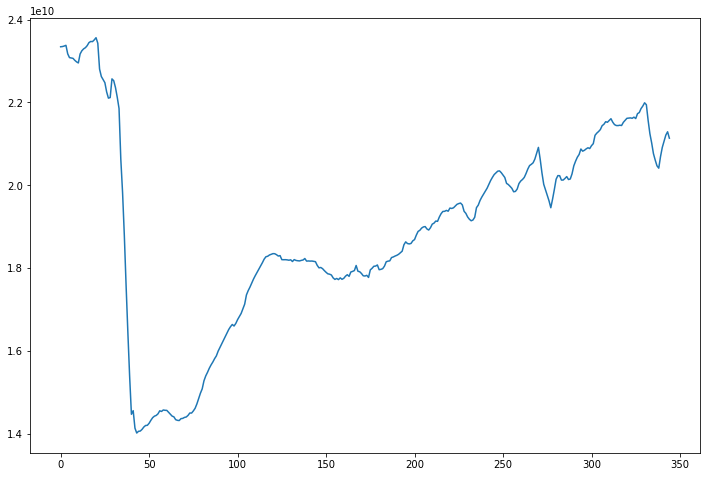

In [53]:
plt.figure(figsize = (12,8))
sns.lineplot(data = series["Contacts"])

Lets also check out the rolling index inorder to get a smooth curve. We will calculate 7day rolling index

In [54]:
series.loc[0,'Contacts']

23344416920.08962

In [55]:
(val,num) = series.shape
val
#No. of lines in our dataset

345

In [56]:
ls = []
for i in range(0,val):
    temp = series.loc[i,'Contacts']
    count = 1
    if(i > 0):
        temp += series.loc[i-1,'Contacts']
        count += 1
    if(i > 1):
        temp += series.loc[i-2,'Contacts']
        count += 1
    if(i > 2):
        temp += series.loc[i-3,'Contacts']
        count += 1
    if(i < val-1):
        temp += series.loc[i+1,'Contacts']
        count += 1
    if(i < val-2):
        temp += series.loc[i+2,'Contacts']
        count += 1
    if(i < val-3):
        temp += series.loc[i+3,'Contacts']
        count += 1
    ls.append(temp/count)
series['Smooth_contact'] = ls

In [57]:
series.head()

,Date,Contacts,Smooth_contact
0,2020-02-17,2.334442e+10,2.335870e+10
1,2020-02-18,2.334950e+10,2.332165e+10
2,2020-02-19,2.336171e+10,2.328180e+10
3,2020-02-20,2.337918e+10,2.325203e+10
4,2020-02-21,2.317343e+10,2.321206e+10


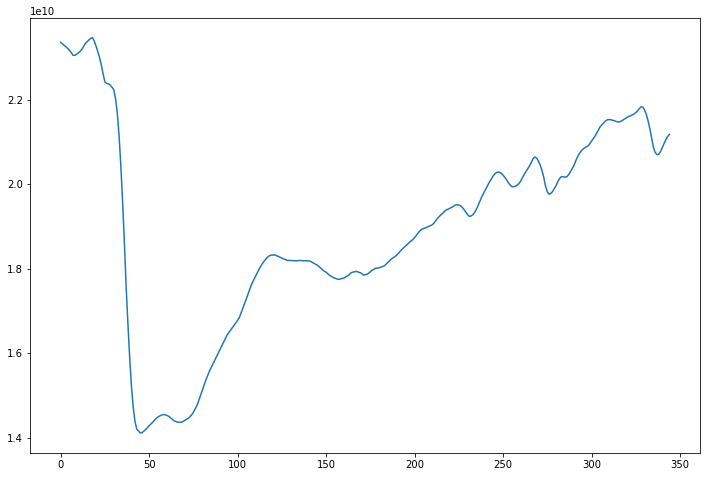

In [58]:
plt.figure(figsize = (12,8))
sns.lineplot(data = series["Smooth_contact"])

## Correlation Initial Contact and Beta

In [59]:
main_df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\Mobility\Beta_values.csv")
main_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
main_df.head()

,District Name,Kpar1,Kpar2,Kpar3,Kpar4,Kpar5,Population
0,AP_Anantapuram,0.126320,0.194583,0.205823,0.001022,0.000886,4083315
1,AP_Guntur,0.096631,0.133225,0.147598,0.001067,0.002730,4889230
2,AP_Krishna,0.117666,0.145463,0.261923,0.001746,0.000610,4529009
3,AP_Kurnool,0.078113,0.141592,0.073303,0.000669,0.003767,4046601
4,AP_Srikakulam,0.110162,0.153025,0.207779,0.000963,0.001261,2699471


In [60]:
X = main_df['Population'].values
X = X.reshape(-1,1)
len(X)

477

In [61]:
y = model_1.predict(X)

In [62]:
new = main_df['Kpar2'].values

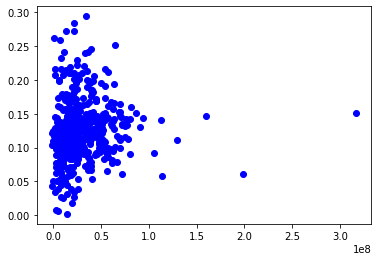

In [63]:
plt.scatter(y,new,c = "blue")

In [64]:
main_df.corr()

,Kpar1,Kpar2,Kpar3,Kpar4,Kpar5,Population
Kpar1,1.000000,0.623878,0.021214,0.123481,-0.123740,0.008203
Kpar2,0.623878,1.000000,0.274606,0.049203,0.036193,0.075051
Kpar3,0.021214,0.274606,1.000000,-0.000446,-0.100607,0.017416
Kpar4,0.123481,0.049203,-0.000446,1.000000,0.146809,-0.030176
Kpar5,-0.123740,0.036193,-0.100607,0.146809,1.000000,0.126278
Population,0.008203,0.075051,0.017416,-0.030176,0.126278,1.000000


## Mobility Time series for districts (Example)

In [65]:
df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\Mobility\India.csv")
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,recreation,grocery,parks,stations,workplace,home
0,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,15-02-2020,1.0,2.0,3.0,3.0,5.0,0.0
1,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,16-02-2020,2.0,2.0,3.0,2.0,0.0,0.0
2,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,17-02-2020,-1.0,1.0,3.0,1.0,4.0,0.0
3,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,18-02-2020,0.0,2.0,4.0,2.0,3.0,0.0
4,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,19-02-2020,0.0,2.0,1.0,1.0,4.0,1.0


Inorder to operate between two datasets first we need to manipulate the reference tokens which in this case are the states and cities such that we have them in comparable terms

In [66]:
main_df= main_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [67]:
main_df.head()

,District Name,Kpar1,Kpar2,Kpar3,Kpar4,Kpar5,Population
0,ap_anantapuram,0.126320,0.194583,0.205823,0.001022,0.000886,4083315
1,ap_guntur,0.096631,0.133225,0.147598,0.001067,0.002730,4889230
2,ap_krishna,0.117666,0.145463,0.261923,0.001746,0.000610,4529009
3,ap_kurnool,0.078113,0.141592,0.073303,0.000669,0.003767,4046601
4,ap_srikakulam,0.110162,0.153025,0.207779,0.000963,0.001261,2699471


Now we need to divide the district name into state and city

In [68]:
(val,num) = main_df.shape
val

477

In [69]:
l1 = []
l2 = []
for i in range(0,val):
    s = main_df.loc[i,'District Name']
    s = s.split("_")
    l1.append(s[0])
    l2.append(s[1])
main_df['State'] = l1
main_df['City'] = l2

In [70]:
main_df.head()

,District Name,Kpar1,Kpar2,Kpar3,Kpar4,Kpar5,Population,State,City
0,ap_anantapuram,0.126320,0.194583,0.205823,0.001022,0.000886,4083315,ap,anantapuram
1,ap_guntur,0.096631,0.133225,0.147598,0.001067,0.002730,4889230,ap,guntur
2,ap_krishna,0.117666,0.145463,0.261923,0.001746,0.000610,4529009,ap,krishna
3,ap_kurnool,0.078113,0.141592,0.073303,0.000669,0.003767,4046601,ap,kurnool
4,ap_srikakulam,0.110162,0.153025,0.207779,0.000963,0.001261,2699471,ap,srikakulam


In [71]:
st = "C:\\Users\\varun\\Desktop\\Udacity\\UGP\\Mobility_city\\" + s + ".csv"
main_df.to_csv(st, index=False)

TypeError: can only concatenate str (not "list") to str

We have successfully fixed one of the dataset, lets fix the second one

In [72]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,recreation,grocery,parks,stations,workplace,home
0,in,india,NaN,NaN,NaN,NaN,NaN,chijkbesa_bfyzarphnchafpjnc,15-02-2020,1.0,2.0,3.0,3.0,5.0,0.0
1,in,india,NaN,NaN,NaN,NaN,NaN,chijkbesa_bfyzarphnchafpjnc,16-02-2020,2.0,2.0,3.0,2.0,0.0,0.0
2,in,india,NaN,NaN,NaN,NaN,NaN,chijkbesa_bfyzarphnchafpjnc,17-02-2020,-1.0,1.0,3.0,1.0,4.0,0.0
3,in,india,NaN,NaN,NaN,NaN,NaN,chijkbesa_bfyzarphnchafpjnc,18-02-2020,0.0,2.0,4.0,2.0,3.0,0.0
4,in,india,NaN,NaN,NaN,NaN,NaN,chijkbesa_bfyzarphnchafpjnc,19-02-2020,0.0,2.0,1.0,1.0,4.0,1.0


In [73]:
l1 = list(df['sub_region_2'].unique())

In [74]:
l1

[nan,
 'north and middle andaman',
 'south andaman',
 'anantapuram',
 'chittoor',
 'east godavari',
 'guntur',
 'krishna',
 'kurnool',
 'prakasam',
 'sri potti sriramulu nellore district',
 'srikakulam',
 'vishakhapatnam',
 'vizianagaram',
 'west godavari',
 'ysr district',
 'east kameng',
 'east siang',
 'papum pare',
 'tawang',
 'west kameng',
 'baksa',
 'barpeta',
 'bongaigaon',
 'cachar',
 'chirang',
 'darrang',
 'dhemaji',
 'dhubri',
 'dibrugarh',
 'dima hasao',
 'goalpara',
 'golaghat',
 'hailakandi',
 'jorhat',
 'kamrup',
 'kamrup metropolitan',
 'karbi anglong',
 'karimganj',
 'kokrajhar',
 'lakhimpur',
 'morigaon',
 'nagaon',
 'nalbari',
 'sivasagar',
 'sonitpur',
 'tinsukia',
 'udalguri',
 'araria',
 'arwal',
 'aurangabad',
 'banka',
 'begusarai',
 'bhagalpur',
 'bhojpur',
 'buxar',
 'darbhanga',
 'gaya',
 'gopalganj',
 'jamui',
 'jehanabad',
 'kaimur',
 'katihar',
 'khagaria',
 'kishanganj',
 'lakhisarai',
 'madhepura',
 'madhubani',
 'munger',
 'muzaffarpur',
 'nalanda',
 '

In [76]:
(val,num) = main_df.shape
for i in range(0,val):
    s = main_df.loc[i,'City']
    df_temp_save = pd.DataFrame(columns = ['Date', 'Mobility'])
    if(s in l1):
        pop = main_df.loc[i,'Population']
        pop = (pop)
        pop = pop.reshape(-1,1)
        H = model_2.predict(pop)[0]
        W = model_3.predict(pop)[0]
        S = model_4.predict(pop)[0]
        O = model_5.predict(pop)[0]
        temp_df = df[df['sub_region_2'] == s]
        df_temp_save['Date'] = temp_df['date']
        df_temp_save['Mobility'] = ((100 + temp_df['workplace'])*(S + W) + (100 + temp_df['home'])*(H) + (300 + temp_df['recreation']+temp_df['parks']+temp_df['grocery'])*O/3)/100
        vars1 = main_df.loc[i,'State']
        st = "C:\\Users\\varun\\Desktop\\Udacity\\UGP\\Mobility_city\\" + vars1 + "_" + s + ".csv"
        df_temp_save.to_csv(st, index=False)

In [82]:
new_df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\UGP\Mobility_city\gj_ahmedabad.csv")
new_df.head()

,Date,Mobility
0,15-02-2020,1.145952e+08
1,16-02-2020,1.136584e+08
2,17-02-2020,1.157832e+08
3,18-02-2020,1.156359e+08
4,19-02-2020,1.154787e+08


In [83]:
new_df["Date"] = pd.to_datetime(new_df["Date"])

In [84]:
ls = []
(val,num) = new_df.shape
for i in range(0,val):
    temp = new_df.loc[i,'Mobility']
    count = 1
    if(i > 0):
        temp += new_df.loc[i-1,'Mobility']
        count += 1
    if(i > 1):
        temp += new_df.loc[i-2,'Mobility']
        count += 1
    if(i > 2):
        temp += new_df.loc[i-3,'Mobility']
        count += 1
    if(i < val-1):
        temp += new_df.loc[i+1,'Mobility']
        count += 1
    if(i < val-2):
        temp += new_df.loc[i+2,'Mobility']
        count += 1
    if(i < val-3):
        temp += new_df.loc[i+3,'Mobility']
        count += 1
    ls.append(temp/count)
new_df['Smooth_contact'] = ls

In [85]:
new_df.head()

,Date,Mobility,Smooth_contact
0,2020-02-15,1.145952e+08,1.149182e+08
1,2020-02-16,1.136584e+08,1.150303e+08
2,2020-02-17,1.157832e+08,1.153337e+08
3,2020-02-18,1.156359e+08,1.142686e+08
4,2020-02-19,1.154787e+08,1.140458e+08


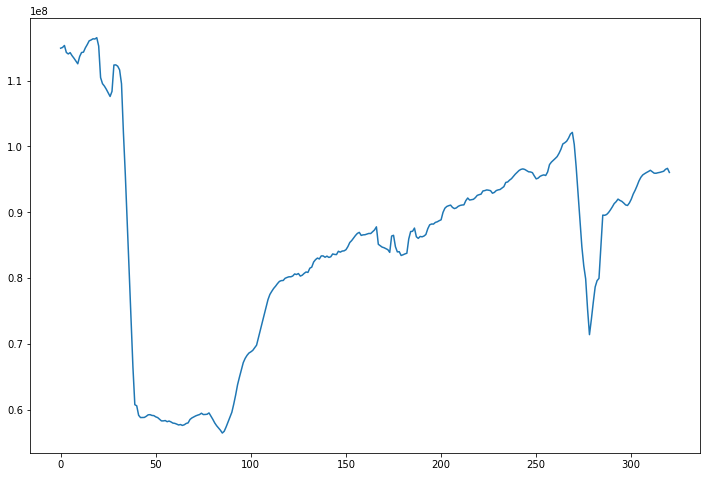

In [86]:
plt.figure(figsize = (12,8))
sns.lineplot(data = new_df["Smooth_contact"])